## 1-)SQL and Pandas DataFrame Operations

In [1]:
import pandas as pd

In [2]:
%load_ext sql

In [3]:
%sql sqlite:///vbo.db

In [5]:
df=%sql SELECT COUNT(CustomerID) AS Number_of_Customers, Country FROM Customers GROUP BY Country ORDER BY Number_of_Customers DESC;

 * sqlite:///vbo.db
Done.


In [6]:
df

Number_of_Customers,Country
13,USA
11,Germany
11,France
9,Brazil
7,UK
5,Spain
5,Mexico
4,Venezuela
3,Italy
3,Canada


In [7]:
type(df)

sql.run.ResultSet

In [8]:
df1=pd.DataFrame(df,columns=["Number of Customers","Country"])

In [11]:
df1.head()

,Number of Customers,Country
0,13,USA
1,11,Germany
2,11,France
3,9,Brazil
4,7,UK


In [12]:
type(df1)

pandas.core.frame.DataFrame

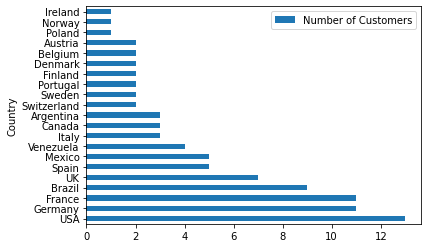

In [14]:
df1.plot.barh(x="Country" ,y="Number of Customers");

## 2-)Sqlite3 Operation with Python

In [15]:
import sqlite3

In [16]:
conn = sqlite3.connect('vbo.db')

In [19]:
c = conn.cursor() # This is used  for run queries

In [20]:
import pandas as pd

In [21]:
pd.read_sql("SELECT COUNT(CustomerID) AS Number_of_Customers, Country FROM Customers GROUP BY Country ORDER BY Number_of_Customers DESC",conn)

,Number_of_Customers,Country
0,13,USA
1,11,Germany
2,11,France
3,9,Brazil
4,7,UK
5,5,Spain
6,5,Mexico
7,4,Venezuela
8,3,Italy
9,3,Canada


In [22]:
pd.read_sql("""SELECT COUNT(CustomerID) AS Number_of_Customers, Country
FROM Customers 
GROUP BY Country 
ORDER BY Number_of_Customers DESC""",conn)

,Number_of_Customers,Country
0,13,USA
1,11,Germany
2,11,France
3,9,Brazil
4,7,UK
5,5,Spain
6,5,Mexico
7,4,Venezuela
8,3,Italy
9,3,Canada


In [23]:
ab=pd.read_sql("""SELECT COUNT(CustomerID) AS Number_of_Customers, Country
FROM Customers 
GROUP BY Country 
ORDER BY Number_of_Customers DESC""",conn)

In [25]:
ab.head()

,Number_of_Customers,Country
0,13,USA
1,11,Germany
2,11,France
3,9,Brazil
4,7,UK


In [26]:
type(ab)

pandas.core.frame.DataFrame

### 2.1) conn.close()

In [27]:
c.execute("SELECT CustomerName FROM Customers LIMIT 5;")

In [28]:
c.fetchone()

('Alfreds Futterkiste',)

In [29]:
c.fetchall()

[('Ana Trujillo Emparedados y helados',),
 ('Antonio Moreno Taquería',),
 ('Around the Horn',),
 ('Berglunds snabbköp',)]

In [30]:
for row in c.execute('SELECT CustomerName FROM Customers LIMIT 5;'):
                     print(row)

('Alfreds Futterkiste',)
('Ana Trujillo Emparedados y helados',)
('Antonio Moreno Taquería',)
('Around the Horn',)
('Berglunds snabbköp',)


In [31]:
conn.close()